In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [25]:
data = np.loadtxt("/content/ex2data1.txt",delimiter=",")
X = data[:, [0,1]]
Y = data[:,2]

In [26]:
X[:5]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [27]:
Y[:5]

array([0., 0., 0., 1., 1.])

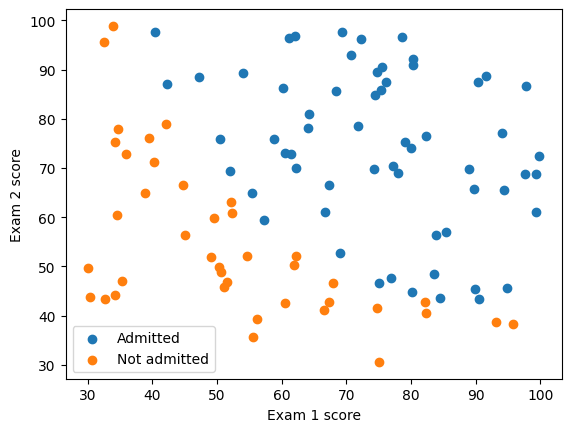

In [28]:
plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

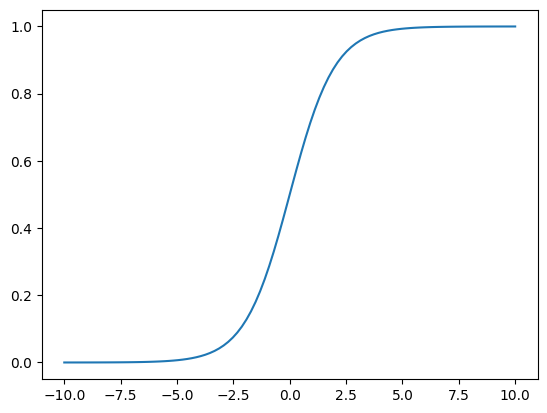

In [30]:
plt.plot()
X_plot = np.linspace(-10, 10, 100)
plt.plot(X_plot, sigmoid(X_plot))
plt.show()

In [31]:
def costFunction(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = -(np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    grad = np.dot(X.T, h - y) / X.shape[0]
    return J, grad

In [32]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0, 0])
J, grad = costFunction(theta, X_train, y)
print(J)  
print(grad)  

0.6931471805599452
[ -0.1        -12.00921659 -11.26284221]


In [33]:
X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([-24, 0.2, 0.2])
J, grad = costFunction(theta, X_train, y)
print(J) 
print(grad)  

0.2183301938265977
[0.04290299 2.56623412 2.64679737]


In [34]:
def cost(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    J = - (np.dot(y, np.log(h)) + np.dot(1 - y, np.log(1 - h))) / X.shape[0]
    return J


def gradient(theta, X, y):
    h = sigmoid(np.dot(X, theta))
    grad = np.dot(X.T, h - y) / X.shape[0]
    return grad


X_train = np.hstack((np.ones((X.shape[0], 1)), X))
theta = np.array([0, 0, 0])
res = optimize.minimize(fun=cost, x0=theta, args=(X_train, y),
                        method='Newton-CG', jac=gradient)
print(res.fun) 
print(res.x)  

0.20349770158945205
[-25.16134246   0.20623179   0.20147167]


In [35]:
def plotDecisionBoundary(theta, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    X_plot = np.c_[xx.ravel(), yy.ravel()]
    X_plot = np.hstack((np.ones((X_plot.shape[0], 1)), X_plot))
    y_plot = np.dot(X_plot, theta).reshape(xx.shape)
    
    plt.figure()
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Admitted")
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Not admitted")
    plt.contour(xx, yy, y_plot, levels=[0])
    plt.xlabel("Exam 1 score")
    plt.ylabel("Exam 2 score")
    plt.legend()
    plt.show()

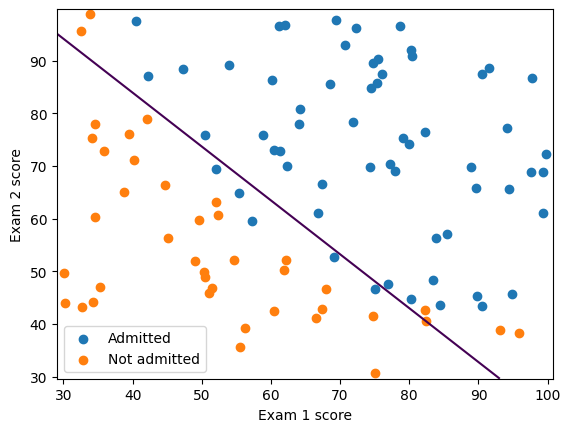

In [36]:
plotDecisionBoundary(res.x, X, y)

In [37]:
prob = sigmoid(np.dot(np.array([1, 45, 85]), res.x))
print(prob)  

0.7762907420026233


In [38]:
def predict(theta, X):
    X_train = np.hstack((np.ones((X.shape[0], 1)), X))
    prob = sigmoid(np.dot(X_train, theta))
    return (prob >= 0.5).astype(int)

In [39]:
np.mean(predict(res.x, X) == y)

0.89